In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fertilizer-prediction/Fertilizer Prediction.csv


## **Importing the Required Library**

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
import catboost as cat_
import seaborn as sns
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
import optuna.integration.lightgbm as lgb2
import pickle


## **Reading Dataset**

In [3]:
data = pd.read_csv("/kaggle/input/fertilizer-prediction/Fertilizer Prediction.csv")

In [4]:
def null_check(data):
    return data.isnull().sum(axis = 0).reset_index();

In [5]:
def duplicate_check(data):
    duplicates = data.duplicated().sum(axis=0)
    print(f'Duplicated exist {duplicates == True}')
    return 

In [6]:
def data_information(data):
    print('Data Information Table')
    display(data.info(verbose = True,show_counts=True))
    print('\n Data Head Table')
    display(data.head())
    print('\n Data Describe Information Table')
    display(data.describe())
    print(f'\n Data Shape: {data.shape}')
    print(f'\n Data Columns {data.columns}')
    print('\n Data Null item Information Table')
    display(null_check(data))
    duplicate_check(data)
    return

In [7]:
data_information(data)

Data Information Table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


None


 Data Head Table


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea



 Data Describe Information Table


,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000



 Data Shape: (99, 9)

 Data Columns Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

 Data Null item Information Table


,index,0
0,Temparature,0
1,Humidity,0
2,Moisture,0
3,Soil Type,0
4,Crop Type,0
5,Nitrogen,0
6,Potassium,0
7,Phosphorous,0
8,Fertilizer Name,0


Duplicated exist False


In [8]:
for column in data.columns : 
    print('Number of unique data for {0} is {1}'.format(column , len(data[column].unique())))
    print('unique data for {0} is {1}'.format(column , data[column].unique()))
    print('=====================================')

Number of unique data for Temparature is 14
unique data for Temparature is [26 29 34 32 28 25 33 30 27 31 35 37 36 38]
Number of unique data for Humidity  is 13
unique data for Humidity  is [52 65 62 54 50 64 60 58 68 70 67 53 72]
Number of unique data for Moisture is 41
unique data for Moisture is [38 45 62 34 46 35 64 50 42 33 28 48 65 41 31 49 39 52 44 53 37 63 30 32
 36 40 27 61 26 58 60 43 29 51 47 54 56 57 55 59 25]
Number of unique data for Soil Type is 5
unique data for Soil Type is ['Sandy' 'Loamy' 'Black' 'Red' 'Clayey']
Number of unique data for Crop Type is 11
unique data for Crop Type is ['Maize' 'Sugarcane' 'Cotton' 'Tobacco' 'Paddy' 'Barley' 'Wheat' 'Millets'
 'Oil seeds' 'Pulses' 'Ground Nuts']
Number of unique data for Nitrogen is 24
unique data for Nitrogen is [37 12  7 22 35  9 41 21 13 14 36 24 10 38 39 11 23  8 15  5 40  6 42  4]
Number of unique data for Potassium is 13
unique data for Potassium is [ 0  9 10  7 15 13 14  8 12 18 19 16 17]
Number of unique data for

## **Visualization**

In [9]:
def make_pie(feature) :
    sns.set(rc = {'figure.figsize':(30, 20)})
    plt.pie(data[feature].value_counts(),labels=list(data[feature].value_counts().index),
        autopct ='%1.2f%%' , labeldistance = 1.1,explode = [0.05 for i in range(len(data[feature].value_counts()))] )
    plt.show()

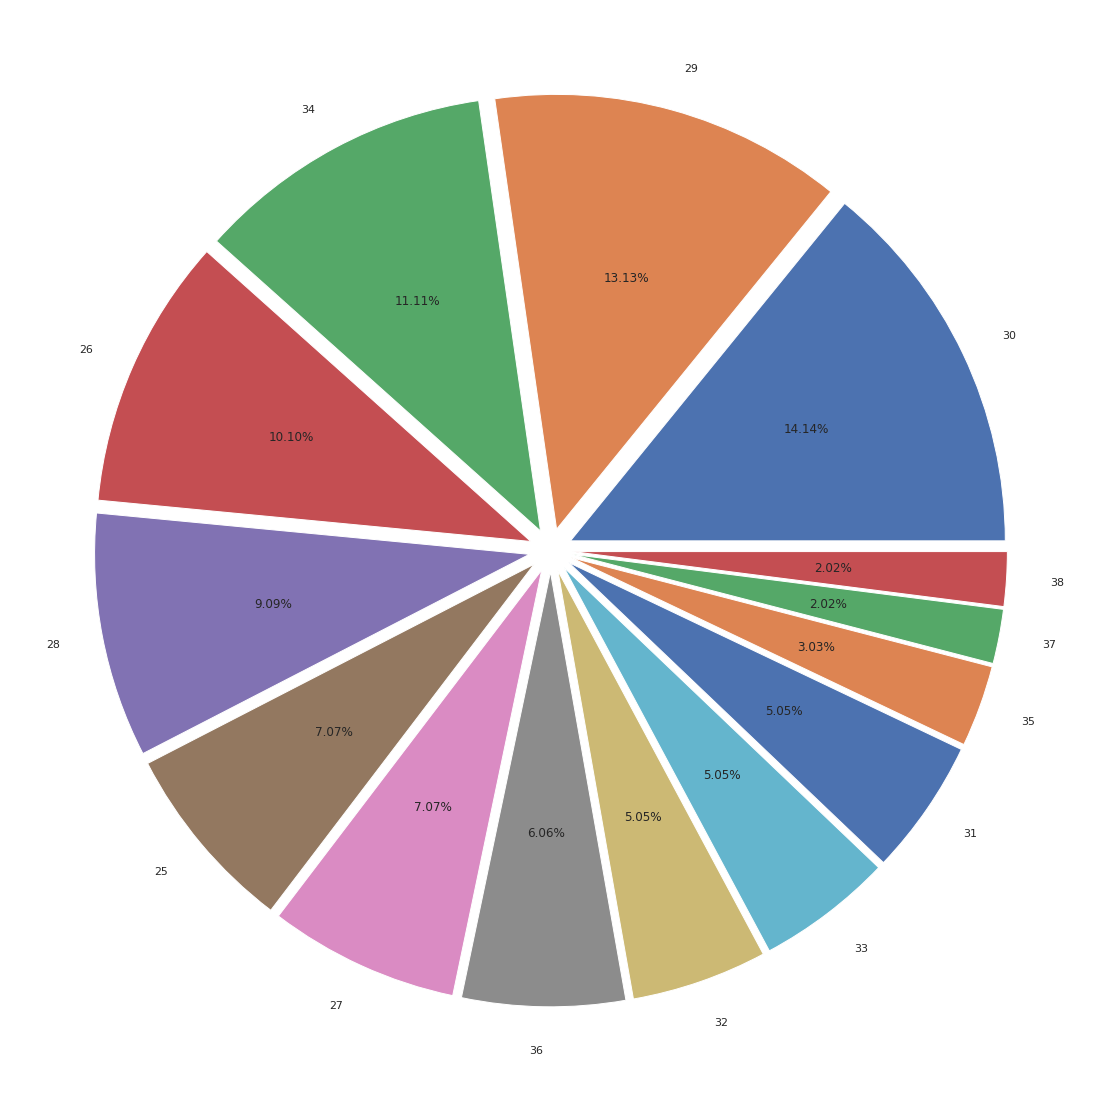

In [10]:
make_pie('Temparature')

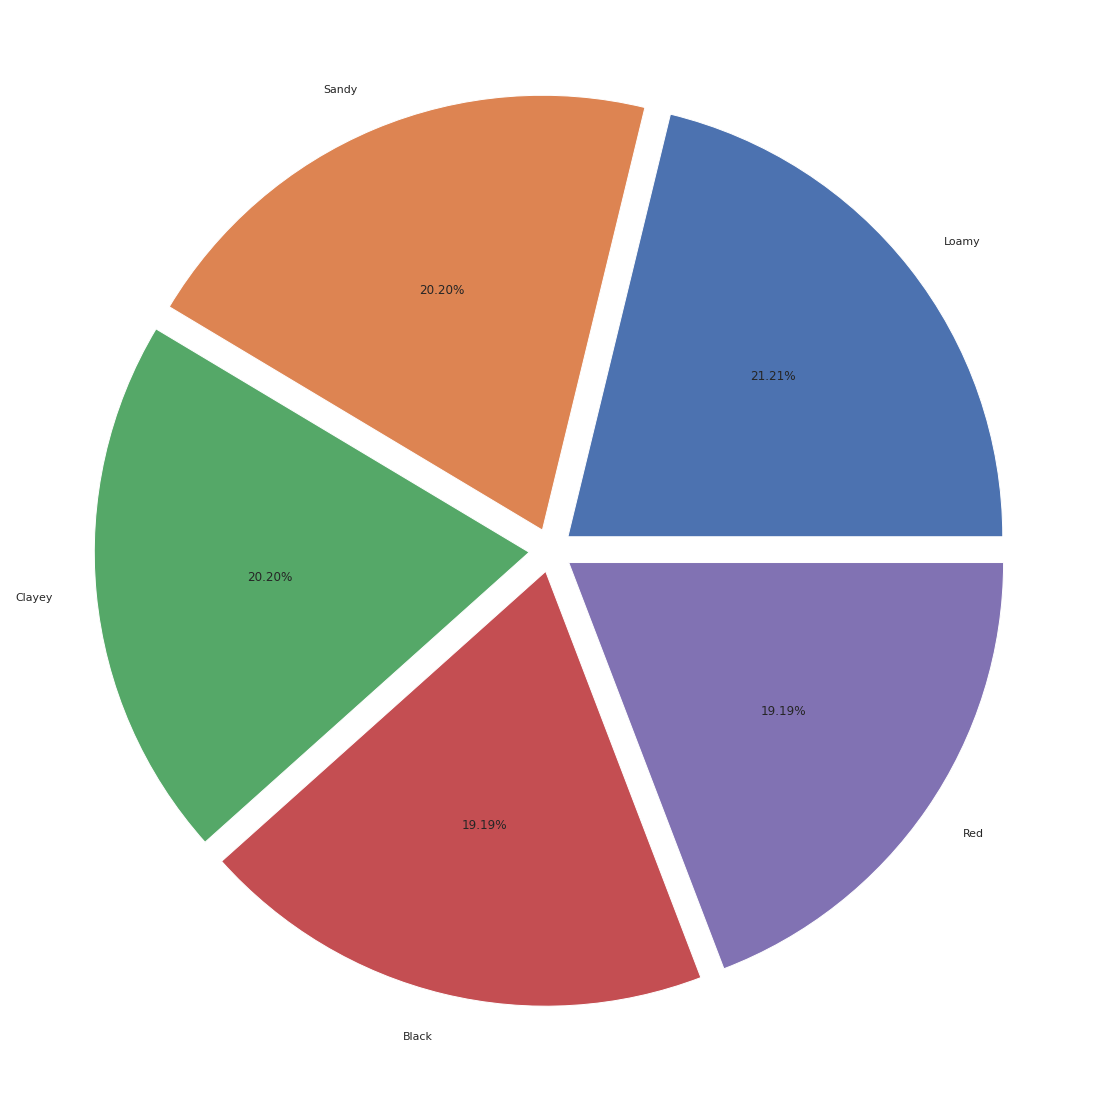

In [11]:
make_pie('Soil Type')

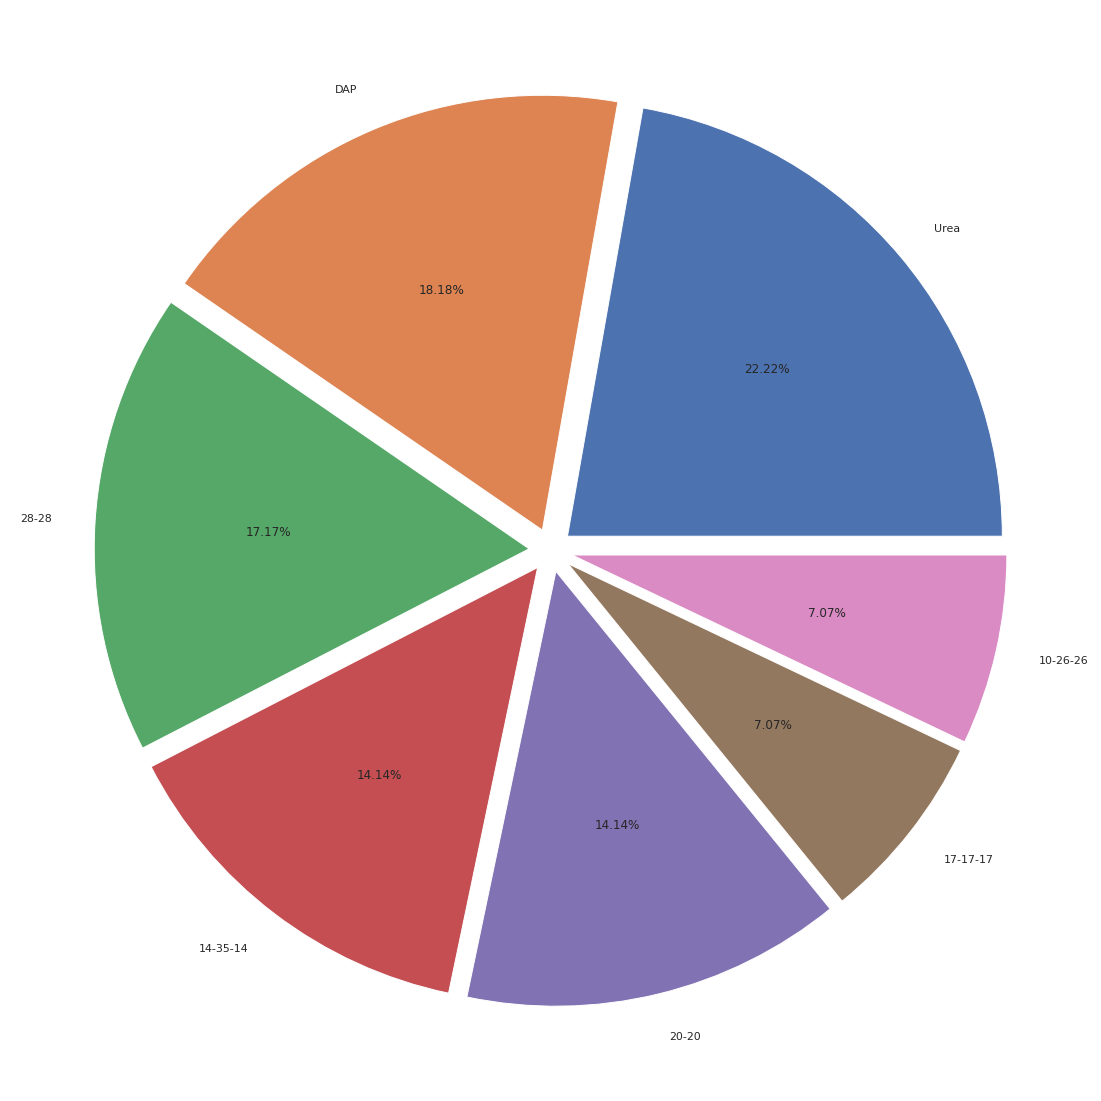

In [12]:
make_pie('Fertilizer Name')

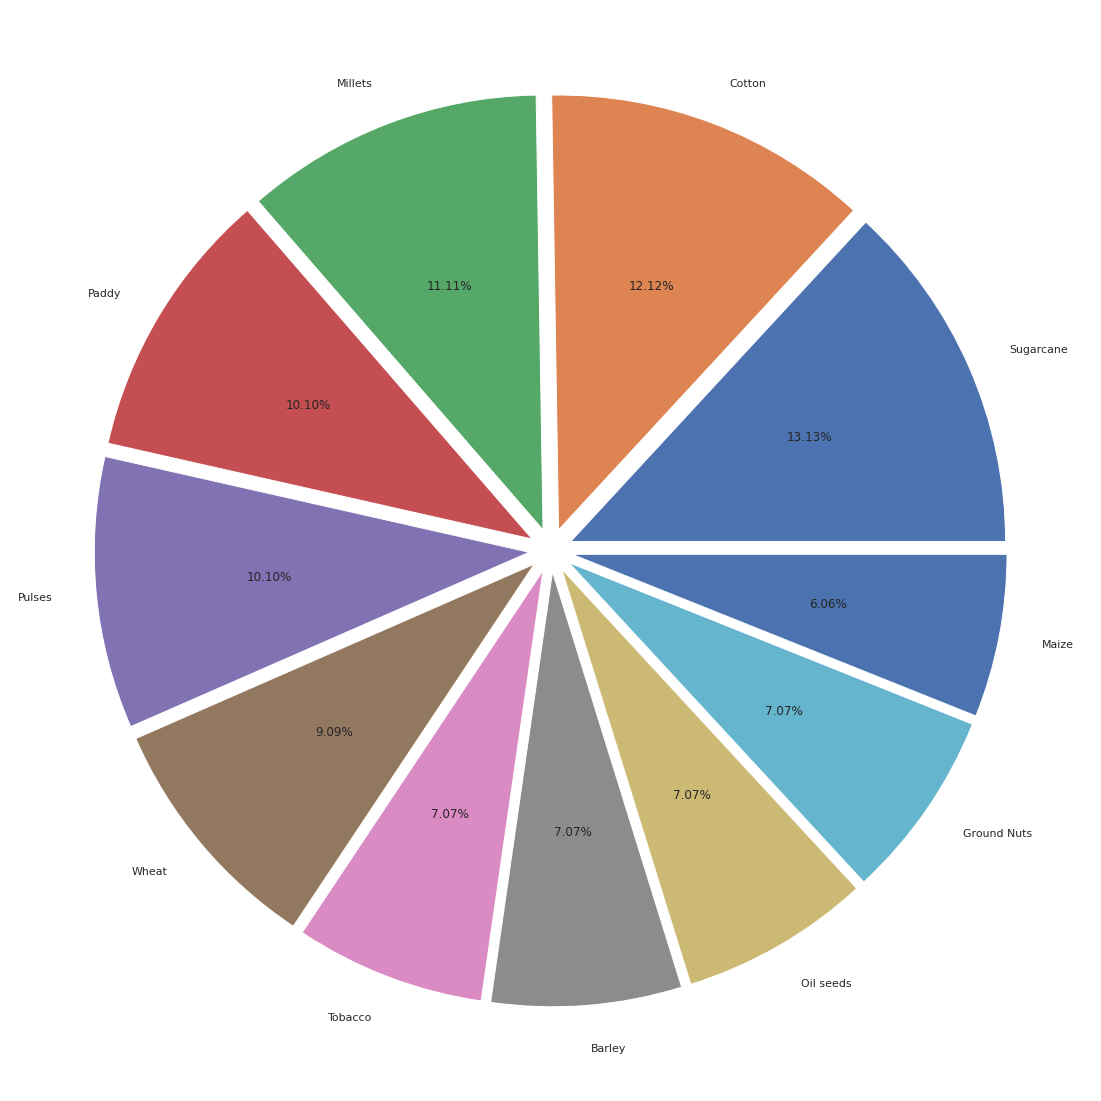

In [13]:
make_pie('Crop Type')

## **Data Engineering**

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [15]:
def make_label_encoder(original_feature , new_feature) : 
    enc  = LabelEncoder()
    enc.fit(data[original_feature])
    data[new_feature] = enc.transform(data[original_feature])
    data.drop([original_feature],axis=1, inplace=True)
    enc_type = pd.DataFrame(zip(enc.classes_,enc.transform(enc.classes_)),columns=['Original','Encoded'])
    enc_type.set_index('Original')
    print(enc_type)

In [16]:
make_label_encoder('Soil Type','Soil_Code')

  Original  Encoded
0    Black        0
1   Clayey        1
2    Loamy        2
3      Red        3
4    Sandy        4


In [17]:
make_label_encoder('Crop Type','Crop_Code')

       Original  Encoded
0        Barley        0
1        Cotton        1
2   Ground Nuts        2
3         Maize        3
4       Millets        4
5     Oil seeds        5
6         Paddy        6
7        Pulses        7
8     Sugarcane        8
9       Tobacco        9
10        Wheat       10


In [18]:
make_label_encoder('Fertilizer Name','Fertilizer_Code')

   Original  Encoded
0  10-26-26        0
1  14-35-14        1
2  17-17-17        2
3     20-20        3
4     28-28        4
5       DAP        5
6      Urea        6


## **Modelling**

In [19]:
train_main = data.drop('Fertilizer_Code', axis=1).copy()
target = data['Fertilizer_Code'].copy()

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_main, target, train_size=0.7, shuffle=True, random_state=42)

In [21]:
train_col = X_train.columns
test_col = X_test.columns

In [22]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [37]:
pickle_out = open('minmax.pkl','wb')
pickle.dump(ms,pickle_out)
pickle_out.close()

In [23]:
X_train = pd.DataFrame(X_train, columns=[train_col])
X_test = pd.DataFrame(X_test, columns=[test_col])

In [32]:
X_train.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil_Code,Crop_Code
0,0.000000,0.000000,0.175,0.527778,0.000000,0.452381,0.25,0.7
1,0.307692,0.363636,0.375,0.527778,0.000000,0.547619,0.75,0.2
2,0.923077,0.909091,0.175,0.194444,0.000000,0.928571,0.00,0.5
3,0.307692,0.363636,0.900,0.166667,0.000000,0.904762,0.50,0.1
4,0.076923,0.090909,0.250,0.194444,0.526316,0.309524,1.00,0.0


In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 100, criterion = 'gini' , random_state= 42)
classifier.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


RandomForestClassifier(random_state=42)

In [25]:
y_pred = classifier.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [26]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

accuracy_score(y_test, y_pred)

0.9666666666666667

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         4
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         7

    accuracy                           0.97        30
   macro avg       0.96      0.93      0.93        30
weighted avg       0.97      0.97      0.96        30



In [28]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


DecisionTreeClassifier()

In [29]:
y_pred = model2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         4
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         7

    accuracy                           0.97        30
   macro avg       0.96      0.93      0.93        30
weighted avg       0.97      0.97      0.96        30



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [30]:
import pickle
pickle_out = open('fertilizer.pkl','wb')
pickle.dump(model2,pickle_out)
pickle_out.close()